### This is the code in class that worked

In [ ]:
import yfinance as yf


amzn_data  = yf.download("AMZN", start='2020-01-01', end='2021-01-01', progress=False)

In [ ]:
amzn_data

In [ ]:
amzn_data2 = amzn_data


amzn_data2['daily_return'] = (amzn_data2['Adj Close'] / amzn_data2['Adj Close'].shift(1)) - 1

**Exercise 1: Copy the dataframe amzn_data into a new dataframe so that amzn_data is unaffected by changes made to the new dataframe**

In [ ]:
plt.plot(amzn_data2)

In [ ]:
mpf.plot(amzn_data2)

**Exercise 2: See if you can adjust the function get_returned_defined_time shown in class to work with yfinance**

It does not have to take in the same arguments it only has to accomplish the goal of returning the amount.

In [ ]:
def get_return_defined_time(df, syear, smonth, sday, eyear, emonth, eday):
    # Create string representations for the dates
    start = f"{syear}-{smonth}-{sday}"
    end = f"{eyear}-{emonth}-{eday}"
    df['Date'] = pd.to_datetime(df['Date'])

    # Use a mask to grab data between defined dates
    # You guys should look up what a mask is (this will count as part of your EC for HW3, use example)
    mask = (df['Date'] >= start) & (df['Date'] <= end)

    # Get the mean of the column named daily return
    daily_ret = df.loc[mask]['daily_return'].mean()

    # Get the number of days between 2 dates
    df2 = df.loc[mask]
    days = df2.shape[0]

    # Return the total return between 2 dates
    return (days * daily_ret)


tot_ret = get_return_defined_time(AMZN, 2020, 1, 1, 2021, 1, 1)
print("Total Return :", tot_ret)

# Total Return : 0.6166402116980415


**Exercise 3: See if you can adjust the function mplfinance plot to work with yfinance. Essentially write your own function to accomplish the same goal**

In [ ]:
# Receives a ticker and the date range for which to plot
def mplfinance_plot(ticker, chart_type, syear, smonth, sday, eyear, emonth, eday):
    # Create string representations for the dates
    start = f"{syear}-{smonth}-{sday}"
    end = f"{eyear}-{emonth}-{eday}"

    try:
        # For Windows
        # df = pd.read_csv('C:/Users/derek/Documents/Python Finance/Python/' + ticker + '.csv',index_col=0,parse_dates=True)
        # For MacOS
        df = pd.read_csv(ticker + '.csv',index_col=0,parse_dates=True)
    except FileNotFoundError:
        print("File Doesn't Exist")
    else:

        # Set data.index as DatetimeIndex
        df.index = pd.DatetimeIndex(df['Date'])

        # Define to only use data between provided dates
        df_sub = df.loc[start:end]

        # A candlestick chart demonstrates the daily open, high, low and closing price of a stock
        mpf.plot(df_sub,type='candle')

        # Plot price changes
        mpf.plot(df_sub,type='line')

        # Moving averages provide trend information (Average of previous 4 observations)
        mpf.plot(df_sub,type='ohlc',mav=4)

        # Define a built in style
        s = mpf.make_mpf_style(base_mpf_style='charles', rc={'font.size': 8})
        # Pass in the defined style to the whole canvas
        fig = mpf.figure(figsize=(12, 8), style=s)
        # Candle stick chart subplot
        ax = fig.add_subplot(2,1,1)
        # Volume chart subplot
        av = fig.add_subplot(2,1,2, sharex=ax)

        # You can plot multiple MAVs, volume, non-trading days
        mpf.plot(df_sub,type=chart_type, mav=(3,5,7), ax=ax, volume=av, show_nontrading=True)

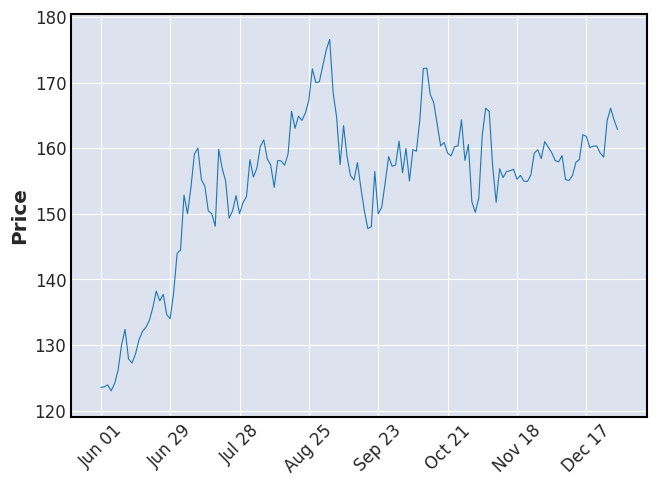

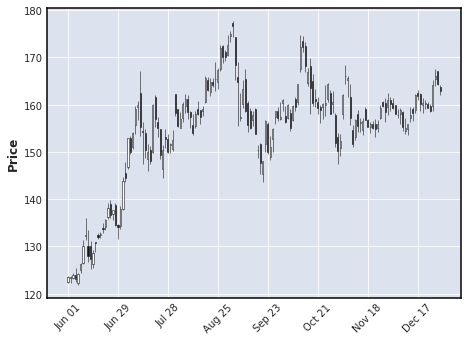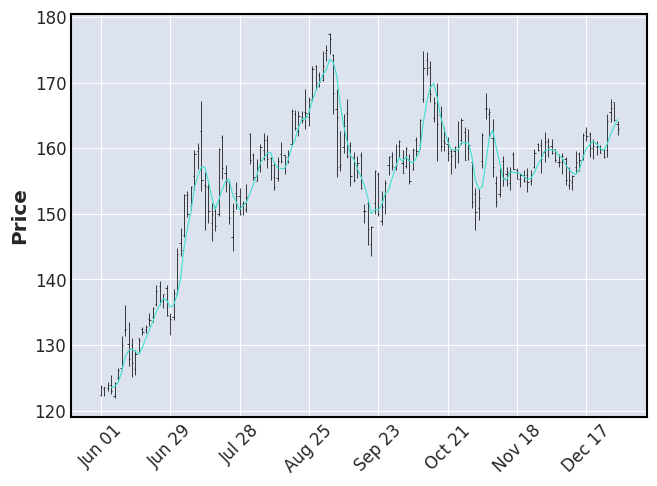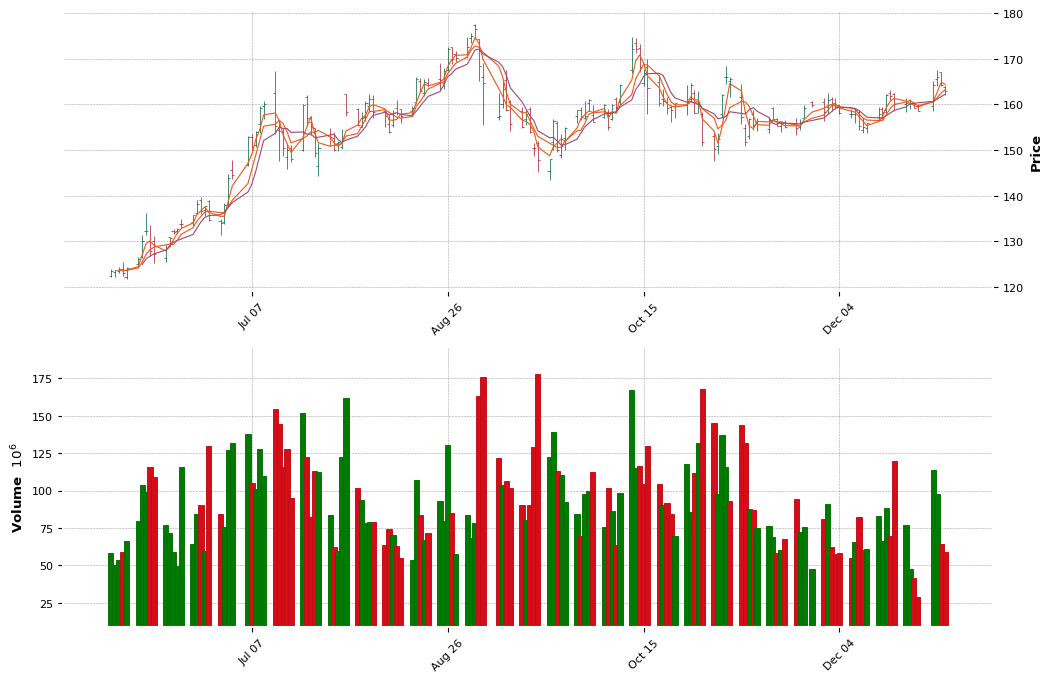

**Exercise 4: See if you can write a function to download multiple stocks using yfinance from a particular date to a particular date and save them to a dataframe. You can save them to a csv but you will have to determine the code for doing so as the one provided will likely not work**

In [ ]:
# starting point

def download_multiple_stocks(syear, smonth, sday, eyear, emonth, eday, *args):
    for x in args:
        save_to_csv_from_yahoo(x, syear, smonth, sday, eyear, emonth, eday)

**Exercise 4.5: If you can do the above merge those into one datafram and see if you can plot them all at the same time**